<a href="https://colab.research.google.com/github/SafiaAli3/Alzheimers-progression-ML/blob/main/Preprocess_Data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exploratory Analysis

## Dataset Attribute Information
1. **Subject ID**: Unique identifier for each participant. Used to track individual patients across multiple visits
2. **MRI ID**: Unique identifier for each MRI scan session. Combines subject ID with the visit number.
3. **Group**: Clinical diagnosis group at the time of visit. Values include `Nondemented`, `Demented`, and `Converted`. This can be used as the prediction target.
4. **Visit**: Numeric label indicating the visit sequence for a subject (e.g., 1st, 2nd, 3rd MRI scan). Useful for longitudinal modeling.
5. **MR Delay**: Number of days between the scheduled clinical assessment and the MRI scan.
6. **M/F**:Biological sex of the subject. M for male, F for female.
7. **Hand**: Dominant hand of the subject. In this dataset, all values are R (right-handed)
8. **Age**: Age of the subject in years at the time of the MRI scan.
9. **EDUC**: Years of formal education completed by the subject.
10. **SES**:Socioeconomic Status on a scale of 1 (lowest) to 5 (highest). Some values are missing.
11. **MMSE**:Mini-Mental State Examination score (range 0–30), a measure of cognitive functioning.
12. **CDR**: Clinical Dementia Rating (0 = no dementia, 0.5 = very mild, 1 = mild, etc.).
13. **eTIV**: Estimated Total Intracranial Volume, representing the size of the cranial cavity (in cubic millimeters).
14. **nWBV**: Normalized Whole Brain Volume, a ratio representing the proportion of intracranial volume occupied by brain tissue.
15. **ASF**: Atlas Scaling Factor, used to normalize brain images to a standard atlas space.

In [ ]:
#/content/sample_data/oasis_longitudinal.csv

df = pd.read_csv("/content/sample_data/oasis_longitudinal.csv")
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1kU5eLc-NtZ83w9k4s8dowF3jwI8TZkGGKmlHVHRKcfA/edit#gid=0


In [ ]:
dataType = df.dtypes
print(dataType)
#print(df.shape)
print("*********************************************************")
dataDescribe =df.describe()
print(dataDescribe)
print("*********************************************************")
print("dataNull")
dataNull = df.isnull().sum()
print(dataNull)
print("*********************************************************")
dataInfo = df.info()
print(dataInfo)

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object
*********************************************************
            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.00

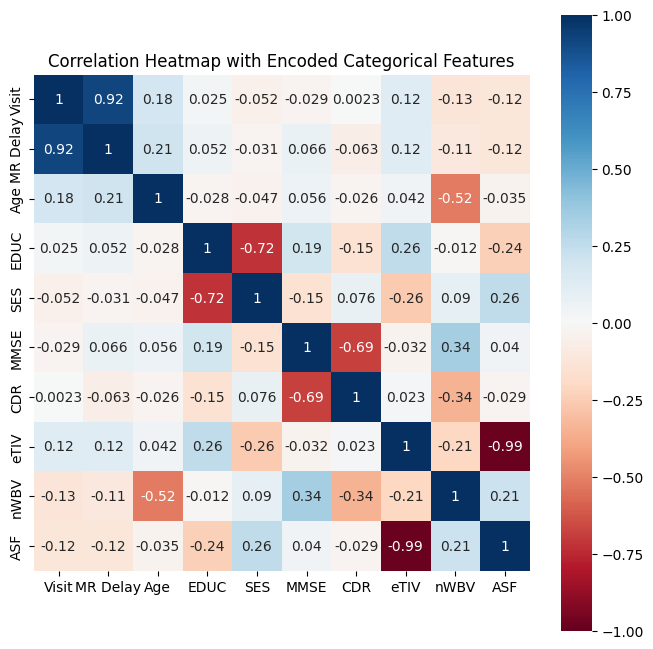

In [ ]:
# Select only numeric columns
#numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
#corr = numeric_df.corr()


# Apply one-hot encoding to nominal categorical columns for models that avoid introducing any bias from numeric values.
#df_encoded = pd.get_dummies(df, columns=['Group', 'M/F'], drop_first=True)

# Now you can use df_encoded for correlation or ML
numeric_df = df_encoded.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

# Plot correlation heatmap

plt.figure(figsize=(8, 8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap='RdBu', square=True)
plt.title("Correlation Heatmap with Encoded Categorical Features")
plt.show()


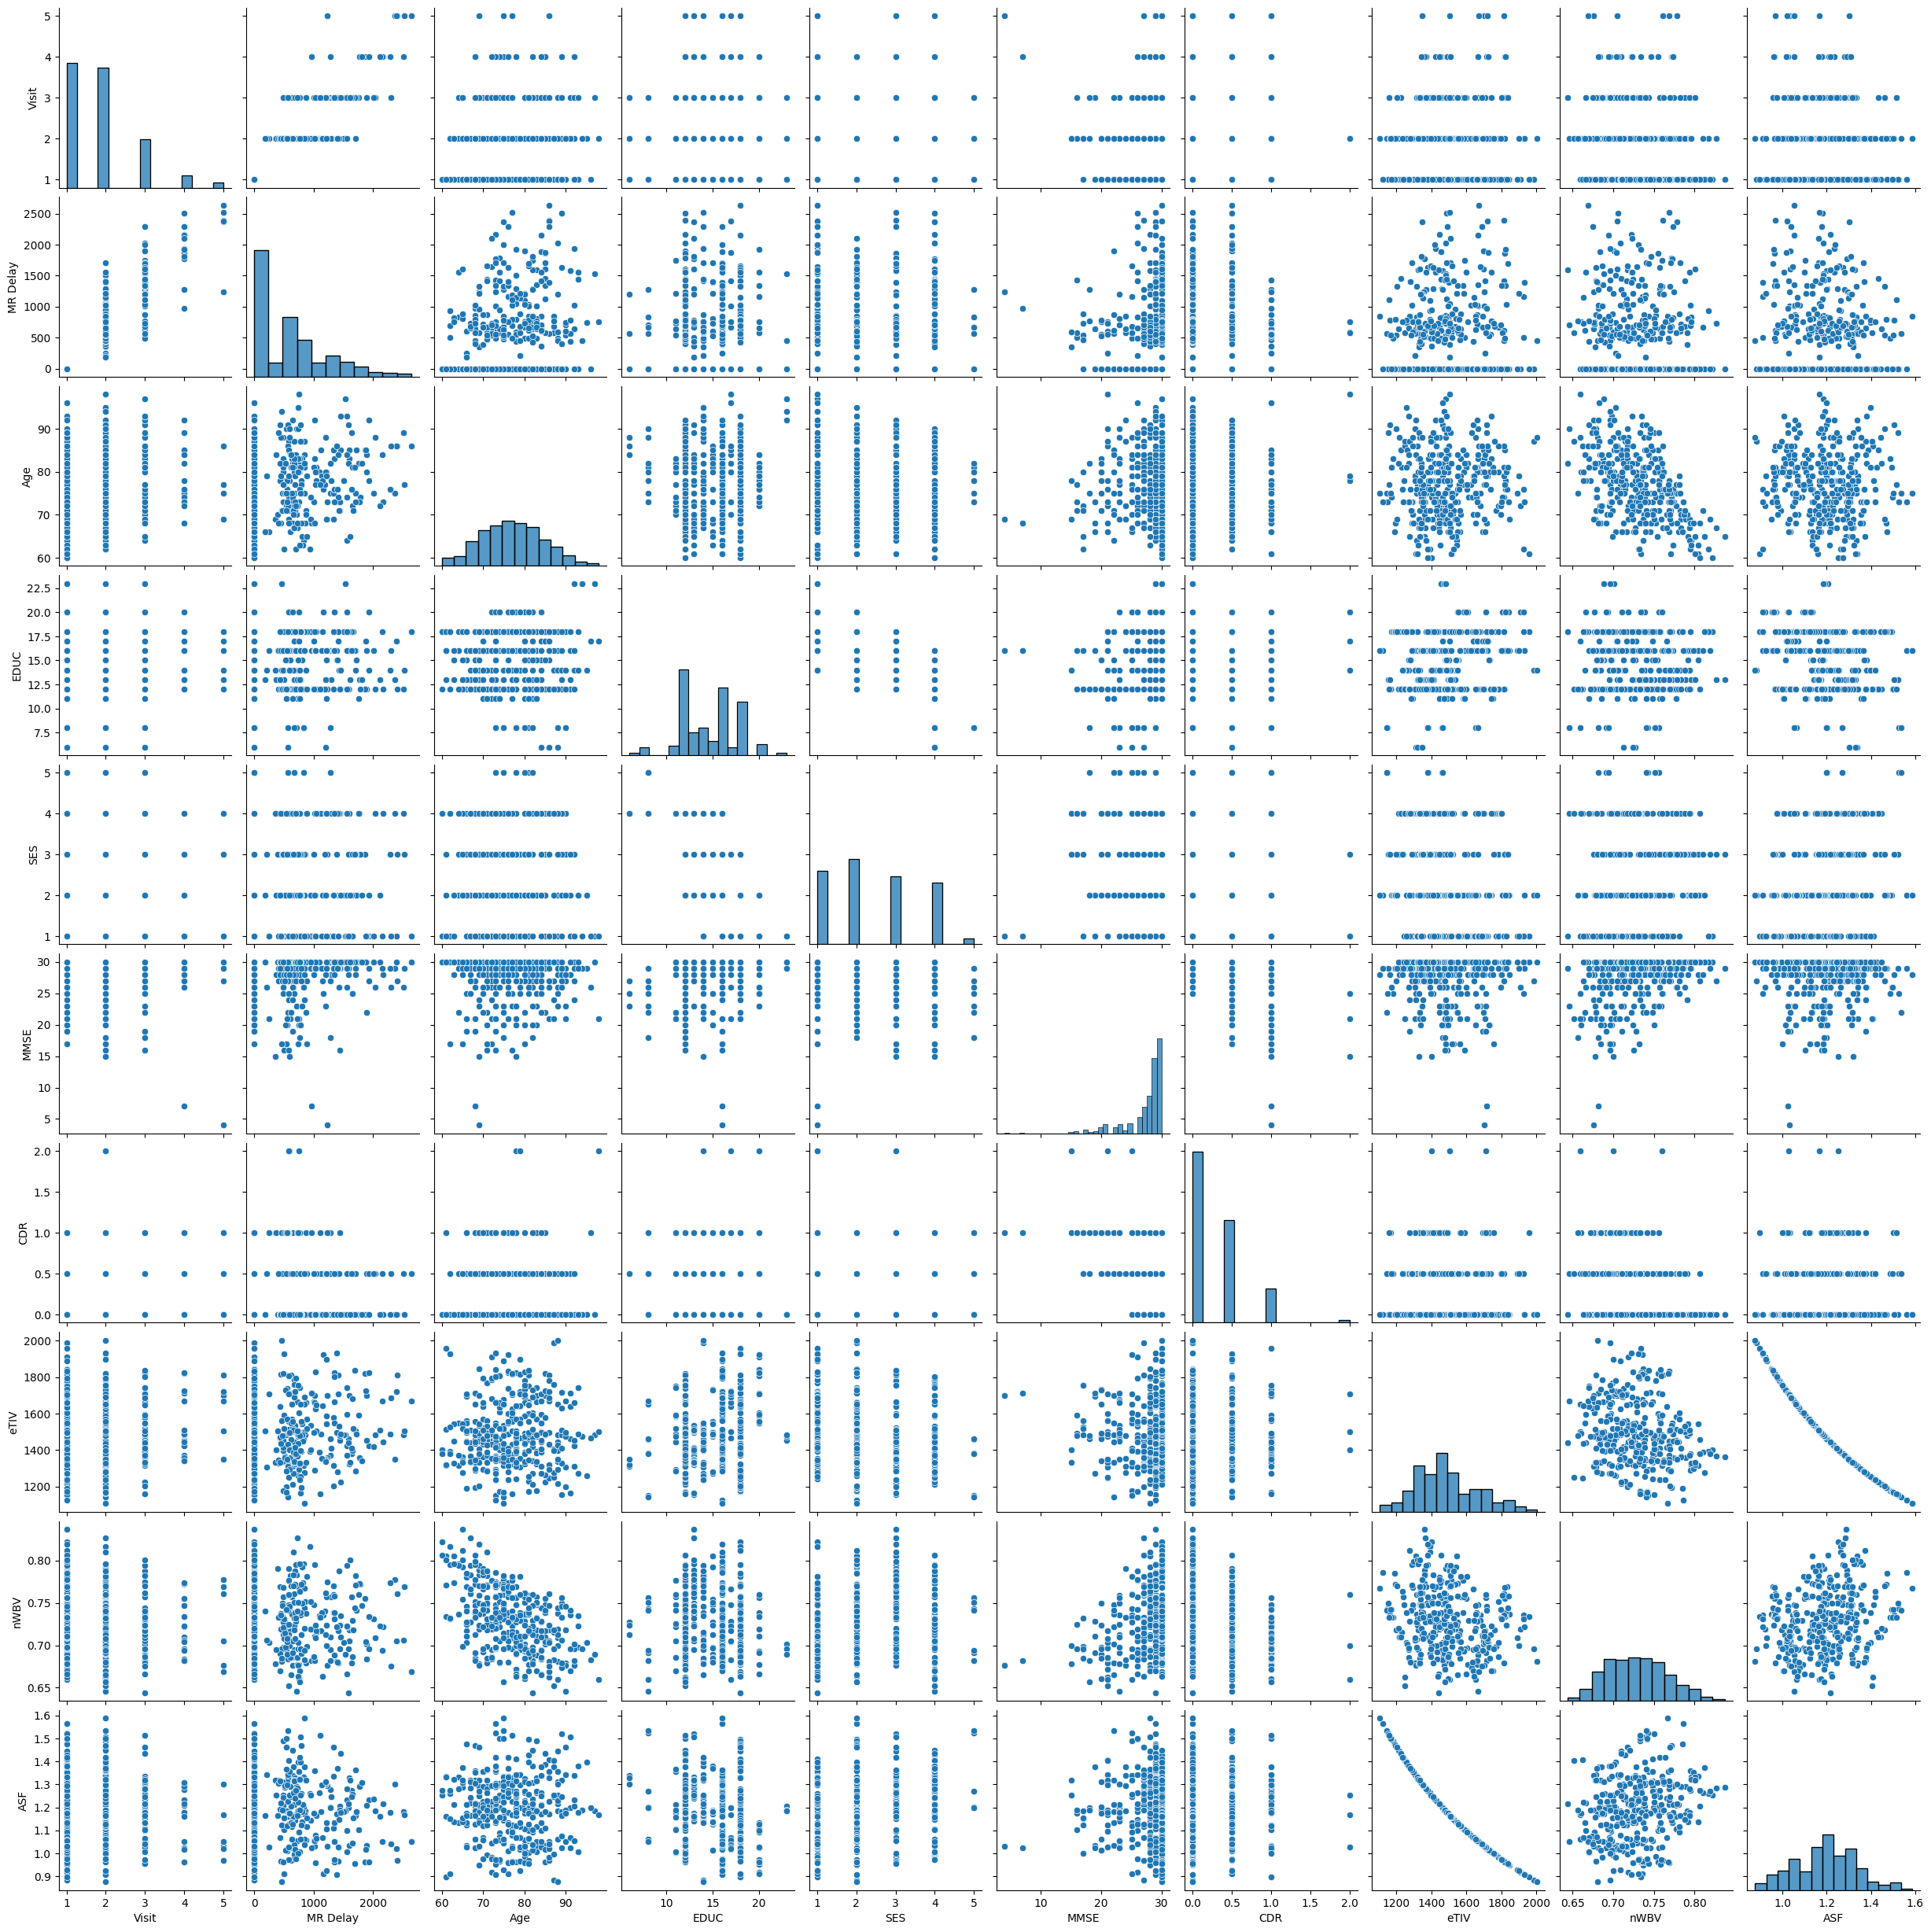

In [ ]:
sns.pairplot(df)

In [ ]:
#which column is missing data?
print(df.isnull().sum())

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [ ]:
# i group the MR as MR1, MR2, MR3 since they are are from mostly the same patient?

df['MR_Group'] = df.groupby('Subject ID')['Visit'].rank(method='dense').astype(int).apply(lambda x: f'MR{x}')
print(df[['Subject ID', 'Visit', 'MR_Group']].head(20))


   Subject ID  Visit MR_Group
0   OAS2_0001      1      MR1
1   OAS2_0001      2      MR2
2   OAS2_0002      1      MR1
3   OAS2_0002      2      MR2
4   OAS2_0002      3      MR3
5   OAS2_0004      1      MR1
6   OAS2_0004      2      MR2
7   OAS2_0005      1      MR1
8   OAS2_0005      2      MR2
9   OAS2_0005      3      MR3
10  OAS2_0007      1      MR1
11  OAS2_0007      3      MR2
12  OAS2_0007      4      MR3
13  OAS2_0008      1      MR1
14  OAS2_0008      2      MR2
15  OAS2_0009      1      MR1
16  OAS2_0009      2      MR2
17  OAS2_0010      1      MR1
18  OAS2_0010      2      MR2
19  OAS2_0012      1      MR1


In [ ]:
# Fill SES with median (it's ordinal/categorical-like)
df['SES'] = df['SES'].fillna(df['SES'].median())

# Optionally, fill MMSE with mean if needed
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].mean())

df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
scaler = StandardScaler()
num_cols = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Map 'F' to 0 and 'M' to 1 (or reverse if preferred)
df['M/F'] = df['M/F'].map({'F': 0, 'M': 1})
df['Group'] = df['Group'].map({'Nondemented': 0, 'Demented': 1, 'Converted': 2})
df['Hand'] = df['Hand'].map({'L': 0, 'R': 1})
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
print(df.isnull().sum())

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [ ]:
# i changed MR ID to be in numeric instead of OAS2_0001_MR1

# Function to extract numeric part from MR ID
def extract_numeric_mr_id(mr_id):
  parts = mr_id.split('_')
  if len(parts) > 2:
    try:
      # Extract the numeric part after the last underscore
      return int(parts[-1][2:])
    except (ValueError, IndexError):
      # Return NaN if parsing fails
      return None
  else:
    # Return NaN if the format is not as expected
    return None
# Apply the function to the 'MRI ID' column
df['MRI ID Numeric'] = df['MRI ID'].apply(extract_numeric_mr_id)
# Display the DataFrame with the new column
print(df[['MRI ID', 'MRI ID Numeric']].head())


          MRI ID  MRI ID Numeric
0  OAS2_0001_MR1               1
1  OAS2_0001_MR2               2
2  OAS2_0002_MR1               1
3  OAS2_0002_MR2               2
4  OAS2_0002_MR3               3


In [ ]:
# adding MRI ID Numeric as a column in the dataset

# Add 'MRI ID Numeric' column by extracting the numeric part from 'MRI ID'
# This assumes 'MRI ID' is in the format 'OAS2_xxxx_MRx' where x is a number
df['MRI ID Numeric'] = df['MRI ID'].apply(lambda x: int(x.split('_')[2][2:]) if '_' in x and x.split('_')[2].startswith('MR') else None)

# Display the first few rows with the new column to verify
print(df[['MRI ID', 'MRI ID Numeric']].head())

df

          MRI ID  MRI ID Numeric
0  OAS2_0001_MR1               1
1  OAS2_0001_MR2               2
2  OAS2_0002_MR1               1
3  OAS2_0002_MR2               2
4  OAS2_0002_MR3               3


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MRI ID Numeric
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,2
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010,2
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037,2
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040,3
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331,1
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323,2


In [ ]:
# make the subject ID label numeric like just 1 instead of OAS2_0001

# Function to extract and map Subject ID to a numeric label
# Create a mapping from original Subject ID strings to numeric IDs
subject_id_mapping = {subject_id: i for i, subject_id in enumerate(df['Subject ID'].unique(), 1)}

# Apply the mapping to create the new numeric 'Subject ID Numeric' column
df['Subject ID Numeric'] = df['Subject ID'].map(subject_id_mapping)

# Display the first few rows with the new column to verify
print(df[['Subject ID', 'Subject ID Numeric']].head())

df

  Subject ID  Subject ID Numeric
0  OAS2_0001                   1
1  OAS2_0001                   1
2  OAS2_0002                   2
3  OAS2_0002                   2
4  OAS2_0002                   2


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MRI ID Numeric,Subject ID Numeric
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,1
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,2,1
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,1,2
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010,2,2
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037,2,149
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040,3,149
370,OAS2_0186,OAS2_0186_MR1,0,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331,1,150
371,OAS2_0186,OAS2_0186_MR2,0,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323,2,150


In [ ]:
# i want to move Subject ID Numeric and MRI ID Numeric as the first 2 columns of the dataset

# Reorder columns to place 'Subject ID Numeric' and 'MRI ID Numeric' at the beginning
cols = ['Subject ID Numeric', 'MRI ID Numeric'] + [col for col in df.columns if col not in ['Subject ID Numeric', 'MRI ID Numeric']]
df = df[cols]

df

,Subject ID Numeric,MRI ID Numeric,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,OAS2_0001,OAS2_0001_MR1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,2,OAS2_0001,OAS2_0001_MR2,0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,2,2,OAS2_0002,OAS2_0002_MR2,1,2,560,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,2,3,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,149,2,OAS2_0185,OAS2_0185_MR2,1,2,842,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,149,3,OAS2_0185,OAS2_0185_MR3,1,3,2297,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,150,1,OAS2_0186,OAS2_0186_MR1,0,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,150,2,OAS2_0186,OAS2_0186_MR2,0,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
#i want to remove Subject ID and MRI ID from the dataset

df = df.drop(columns=['Subject ID', 'MRI ID'])
print(df.head())

   Subject ID Numeric  MRI ID Numeric  Group  Visit  MR Delay  M/F  Hand  Age  \
0                   1               1      0      1         0    1     1   87   
1                   1               2      0      2       457    1     1   88   
2                   2               1      1      1         0    1     1   75   
3                   2               2      1      2       560    1     1   76   
4                   2               3      1      3      1895    1     1   80   

   EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    14  2.0  27.0  0.0  1987  0.696  0.883  
1    14  2.0  30.0  0.0  2004  0.681  0.876  
2    12  2.0  23.0  0.5  1678  0.736  1.046  
3    12  2.0  28.0  0.5  1738  0.713  1.010  
4    12  2.0  22.0  0.5  1698  0.701  1.034  


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1BNqGfsC1mSuNXUZG_HQpR22cH0D0iReSGUuIfw3ZTwI/edit#gid=0


In [ ]:
#i want to group the dataset based on MRI ID Numeric. grouping them such that all 1 are in a group and likewise

# Group the DataFrame by 'MRI ID Numeric'
grouped_df = df.groupby('MRI ID Numeric')

# You can now iterate through the groups or access specific groups
# Example: Access the group where 'MRI ID Numeric' is 1
group_1 = grouped_df.get_group(1)
print("Data for MRI ID Numeric = 1:")
print(group_1)

# Example: Iterate through all groups and print their keys and the number of rows
for name, group in grouped_df:
    print(f"\nGroup for MRI ID Numeric = {name}: {len(group)} rows")
    # You can process each 'group' DataFrame here as needed

Data for MRI ID Numeric = 1:
     Subject ID Numeric  MRI ID Numeric  Group  Visit  MR Delay  M/F  Hand  \
0                     1               1      0      1         0    1     1   
2                     2               1      1      1         0    1     1   
5                     3               1      0      1         0    0     1   
7                     4               1      0      1         0    1     1   
10                    5               1      1      1         0    1     1   
..                  ...             ...    ...    ...       ...  ...   ...   
359                 146               1      1      1         0    1     1   
361                 147               1      0      1         0    0     1   
365                 148               1      1      1         0    0     1   
367                 149               1      1      1         0    1     1   
370                 150               1      0      1         0    0     1   

     Age  EDUC  SES  MMSE  CDR  eT

In [ ]:
# prompt: create columns for all grouping of the above separation

import pandas as pd
# Assuming 'df' is the DataFrame after the previous steps, including 'MRI ID Numeric' column
# Create dummy columns for each unique value in the 'MRI ID Numeric' groups
# The prefix will be 'MRI ID Numeric Group_' followed by the group number
df_with_group_dummies = pd.get_dummies(df, columns=['MRI ID Numeric'], prefix='MRI ID Numeric Group')

# Display the first few rows to verify the new columns
print(df_with_group_dummies.head())

# Display the columns to see the newly created dummy columns
df_with_group_dummies.columns

   Subject ID Numeric  Group  Visit  MR Delay  M/F  Hand  Age  EDUC  SES  \
0                   1      0      1         0    1     1   87    14  2.0   
1                   1      0      2       457    1     1   88    14  2.0   
2                   2      1      1         0    1     1   75    12  2.0   
3                   2      1      2       560    1     1   76    12  2.0   
4                   2      1      3      1895    1     1   80    12  2.0   

   MMSE  CDR  eTIV   nWBV    ASF  MRI ID Numeric Group_1  \
0  27.0  0.0  1987  0.696  0.883                    True   
1  30.0  0.0  2004  0.681  0.876                   False   
2  23.0  0.5  1678  0.736  1.046                    True   
3  28.0  0.5  1738  0.713  1.010                   False   
4  22.0  0.5  1698  0.701  1.034                   False   

   MRI ID Numeric Group_2  MRI ID Numeric Group_3  MRI ID Numeric Group_4  \
0                   False                   False                   False   
1                    True   

Index(['Subject ID Numeric', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'MRI ID Numeric Group_1', 'MRI ID Numeric Group_2',
       'MRI ID Numeric Group_3', 'MRI ID Numeric Group_4',
       'MRI ID Numeric Group_5'],
      dtype='object')

In [ ]:
# create a interactive sheet to see the dataset of the above grouping and changes
df_with_group_dummies

,Subject ID Numeric,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,MRI ID Numeric Group_1,MRI ID Numeric Group_2,MRI ID Numeric Group_3,MRI ID Numeric Group_4,MRI ID Numeric Group_5
0,1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883,True,False,False,False,False
1,1,0,2,457,1,1,88,14,2.0,30.0,0.0,2004,0.681,0.876,False,True,False,False,False
2,2,1,1,0,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046,True,False,False,False,False
3,2,1,2,560,1,1,76,12,2.0,28.0,0.5,1738,0.713,1.010,False,True,False,False,False
4,2,1,3,1895,1,1,80,12,2.0,22.0,0.5,1698,0.701,1.034,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,149,1,2,842,1,1,82,16,1.0,28.0,0.5,1693,0.694,1.037,False,True,False,False,False
369,149,1,3,2297,1,1,86,16,1.0,26.0,0.5,1688,0.675,1.040,False,False,True,False,False
370,150,0,1,0,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331,True,False,False,False,False
371,150,0,2,763,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323,False,True,False,False,False


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_with_group_dummies)

https://docs.google.com/spreadsheets/d/13CL_RNit203TEjPOwujYwG4r0TSMcJqoWeZAfwE38Fk/edit#gid=0


In [ ]:
# i want to get df with just rows of subject ids with just MR1 ID Numeric value 1

# Assuming 'df' is the DataFrame after the previous steps, including 'MRI ID Numeric' column
# Filter the DataFrame to keep only rows where 'MRI ID Numeric' is 1
df_mr1 = df[df['MRI ID Numeric'] == 1]

# Display the resulting DataFrame
print("DataFrame with only rows where 'MRI ID Numeric' is 1:")
df_mr1

DataFrame with only rows where 'MRI ID Numeric' is 1:


,Subject ID Numeric,MRI ID Numeric,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,1,0,1,0,1,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,2,1,1,1,0,1,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
5,3,1,0,1,0,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,4,1,0,1,0,1,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,5,1,1,1,0,1,1,71,16,2.0,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,146,1,1,1,0,1,1,73,12,2.0,23.0,0.5,1661,0.698,1.056
361,147,1,0,1,0,0,1,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,148,1,1,1,0,0,1,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,149,1,1,1,0,1,1,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_mr1)

https://docs.google.com/spreadsheets/d/1zo0nCX3xsD7gY_fs7yky0KMpYFWrby_kBDfGcdq5VOM/edit#gid=0


In [ ]:
# i want to get df with just rows of subject ids with just MR1 ID Numeric value 2

# Assuming 'df' is the DataFrame after the previous steps, including 'MRI ID Numeric' column
# Filter the DataFrame to keep only rows where 'MRI ID Numeric' is 2
df_mr2 = df[df['MRI ID Numeric'] == 2]

# Display the resulting DataFrame
print("DataFrame with only rows where 'MRI ID Numeric' is 2:")
df_mr2
sheet = sheets.InteractiveSheet(df=df_mr2)

DataFrame with only rows where 'MRI ID Numeric' is 2:
https://docs.google.com/spreadsheets/d/1C14P5wohoVVrqqsKOPI2Uvse-C-KR0c_k2RfoDCiOYI/edit#gid=0


In [ ]:
# i want to get df with just rows of subject ids with just MR1 ID Numeric value 3

# Assuming 'df' is the DataFrame after the previous steps, including 'MRI ID Numeric' column
# Filter the DataFrame to keep only rows where 'MRI ID Numeric' is 3
df_mr3 = df[df['MRI ID Numeric'] == 3]

# Display the resulting DataFrame
print("DataFrame with only rows where 'MRI ID Numeric' is 3:")
df_mr3
sheet = sheets.InteractiveSheet(df=df_mr3)

DataFrame with only rows where 'MRI ID Numeric' is 3:
https://docs.google.com/spreadsheets/d/1Zj9dP_Hamj68N453Baez9ncaKcGjOU_78dpZgx_DJJI/edit#gid=0


In [ ]:
# i want to get df with just rows of subject ids with just MR1 ID Numeric value 4

# Assuming 'df' is the DataFrame after the previous steps, including 'MRI ID Numeric' column
# Filter the DataFrame to keep only rows where 'MRI ID Numeric' is 4
df_mr4 = df[df['MRI ID Numeric'] == 4]

# Display the resulting DataFrame
print("DataFrame with only rows where 'MRI ID Numeric' is 4:")
df_mr4
sheet = sheets.InteractiveSheet(df=df_mr4)

DataFrame with only rows where 'MRI ID Numeric' is 4:
https://docs.google.com/spreadsheets/d/1t2I3gylxhdd4xMo-35ashIH1zPnId8jZBHg76xVjiEU/edit#gid=0


In [ ]:
# i want to get df with just rows of subject ids with just MR1 ID Numeric value 5

# Assuming 'df' is the DataFrame after the previous steps, including 'MRI ID Numeric' column
# Filter the DataFrame to keep only rows where 'MRI ID Numeric' is 5
df_mr5 = df[df['MRI ID Numeric'] == 5]

# Display the resulting DataFrame
print("DataFrame with only rows where 'MRI ID Numeric' is 5:")
df_mr5
sheet = sheets.InteractiveSheet(df=df_mr5)

DataFrame with only rows where 'MRI ID Numeric' is 5:
https://docs.google.com/spreadsheets/d/1N4yiK6GVOMv5Q_Ov8Lvr5HJZabxChcbZQYIc6gCvy8U/edit#gid=0
